# Available XC functionals

A number of exchange–correlation (XC) functionals are available in VeloxChem.

We will calculate the electronic energy of helium using the Hartree–Fock and second-order Møller–Plesset methods as well as Kohn–Sham density functional theory using the available XC functionals.

In [1]:
import matplotlib.pyplot as plt
import veloxchem as vlx

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 4.


In [2]:
molecule = vlx.Molecule.read_str("He   0.000  0.000  0.000")
basis = vlx.MolecularBasis.read(molecule, "cc-pvtz")

* Info * Reading basis set from file: /opt/miniconda3/envs/echem/lib/python3.9/site-packages/veloxchem/basis/CC-PVTZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVTZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

## Hartree–Fock

In [3]:
scf_drv = vlx.ScfRestrictedDriver()

scf_results = scf_drv.compute(molecule, basis)

scf_energies = {}
scf_energies["HF"] = scf_drv.get_scf_energy()

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

## MP2

In [4]:
mp2_drv = vlx.Mp2Driver()
mp2_results = mp2_drv.compute(molecule, basis, scf_drv.mol_orbs)

scf_energies["MP2"] = mp2_results["mp2_energy"] + scf_energies["HF"]

                                                                                                                          
                                                     MP2 Driver Setup                                                     
                                                                                                                          
                               Number of Fock Matrices      : 1                                                           
                               Size of Fock Matrices Batch  : 100                                                         
                               Number of Subcommunicators   : 1                                                           
                               ERI Screening Scheme         : Cauchy Schwarz + Density                                    
                               ERI Screening Threshold      : 1.0e-12                                                     
                

## DFT

In [5]:
for xcfun in vlx.available_functionals():

    scf_drv.xcfun = xcfun
    scf_drv.compute(molecule, basis)
    scf_energies[xcfun] = scf_drv.get_scf_energy()

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

## Plotting the energies

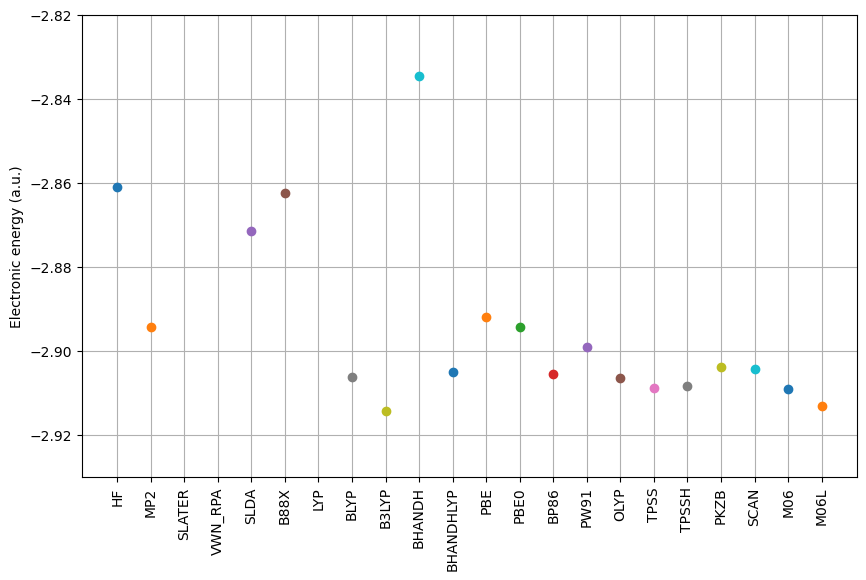

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

number_methods = len(scf_energies)

for i, method in enumerate(scf_energies.keys()):

    ax.plot(i, scf_energies[method], "o")

ax.set_xticks(range(number_methods), scf_energies.keys())
plt.xticks(rotation=90)

ax.set_ylim(-2.93, -2.82)
plt.ylabel("Electronic energy (a.u.)")

plt.grid(True)

plt.show()